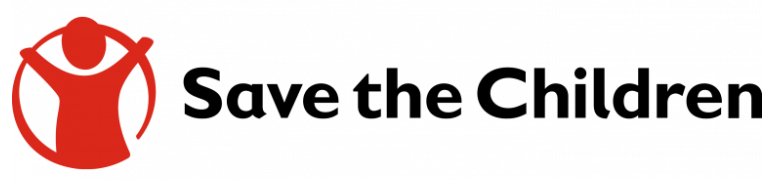

# Extractive summarization for "barrieres and PAF" resulting from Focus Group Discussions (FGDs) for the food diversity Petite Action Faisable (PAF) of Alabarka

### What it it and why conducting such an analysis 

Extractive summarization is a text summarization technique that involves selecting the most important sentences or phrases from a larger body of text and using them to create a summary. This method is called "extractive" because it involves extracting relevant content from the original text and presenting it in a condensed form.

The selection of important sentences is typically done through the use of algorithms and machine learning techniques that analyze the content of the text and identify sentences that contain key information or convey the __main ideas of the text__. These selected sentences are then stitched together to form a summary that captures the essential information of the original text, in our PAF Focus Group,main ideas emerging from barrieres and the PAF.

Extractive summarization has the advantage of being relatively easy to implement and producing summaries that are faithful to the original text, since it uses actual sentences from the text instead of generating new ones. Overall, extractive summarization is a useful tool for quickly generating summaries of large bodies of text and can be used in a variety of applications, including news aggregation, document summarization, and data analysis.

### Importing necessary libraries 

In [1]:
# Data maniupulation and numeric calculation 
import pandas as pd
import numpy as np
# Data vizualizaiton and EDA 
import seaborn as sns
import matplotlib.pyplot as plt
# Bag of Word and  World Cloud 
from nltk.corpus import stopwords
from wordcloud import WordCloud
# Machine Learning 
from sklearn.feature_extraction.text import CountVectorizer
# Text analyis and sentiment analyis 
import nltk
nltk.download('punkt')
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nael\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Reading FGD data for column of interest (barriere and PAF)

In [2]:
# Providing data path (for FGD question on barriere and PAF)
data = "C:/Users/Nael/Desktop/Albarka/Petit_actions/diversite_alimentaire/barriere_PAF.csv"
# Data reading (barrieres and PAF)
df = pd.read_csv(data, encoding='latin-1')  
df.head(18)

,barrieres,PAF
0,"Les femmes sont trop occupées, la chairté du savon, manque de moyen","Continuer l'allaitement maternel jusqu'à l'âge de deux ans, Prépararion de la boullie enrichie, Donner de la soupe legumineuse à l'enfant, Donner des oeufs à l'enfant\n"
1,"Les occupations, Pas d'appui des hommes, la chairté du savon, manque de moyen","Continuer l'allaitement materne jusqu'à l'âge de deux ans,Prépararion de la boullie à la pomme de terre,Prépararion de la boullie enrichie.\n"
2,NaN,"Faire de jardins maraîchers, Création des emplois, Equipements pour les activités maraîchères"
3,Manque d'information et de moyens,"Jardin pour les femmes, Renforcement de capacité, Sensibiliser les communautés sur les cas d'aliments et leur composition"
4,"Manque de temps, Manque de moyens financiers, Non assistance","Pratique du jardin potagé, Pratique de la bouillie enrichie"
...,...,...
13,"Manque de moyens financiers,Indisponibilité des produits maraîchers,Les tabous sociaux","Collecte des intrants pour la fabrication de la bouillie enrichie, Pratique du jardin potagé,Contribution financière dans l'alimentation des enfants, Sensibilisation trimestrielle des hommes mariés\n\nJardin potagé pou chaque ménage si possible"
14,"Manque d'eau pour faire le maraîchage,Manque de moyen financier","Sensibiliser les hommes à appuyer les femmes, Sensibiliser sur l'importance des aliments diversifiés"
15,Ignorance de l'aliment de complément,"Petit commerce, Maraîchage,Elevage"
16,Méconnaissance de l'alimentation de complément,Sensibiliser les hommes à encourager les femmes dans la prise en charge de l'aliment de complément


### Data pre-processing 1 : Adding a comma at the end of each text in a cell and ignoring missing

In [3]:
# define a lambda function to add a dot to each non-missing string
add_dot = lambda x: x + '.' if pd.notna(x) else x

# apply the lambda function to the text_column using the apply() method
df['barrieres'] = df['barrieres'].apply(add_dot)
df['PAF'] = df['PAF'].apply(add_dot)

### Data pre-processing 2 : Replacing comma by a dot in each text cell to have complete sentence

In [4]:
# replace commas with dots in the 'text_column'
df['barrieres'] = df['barrieres'].str.replace(',', '.')
df['PAF'] = df['PAF'].str.replace(',', '.')

### Data pre-processing 3 : Combining and printing  all text in a column as a signle text and ignoring missing value 

In [5]:
#  Combinaison de tous les textes de la colonne barriere et PAF 
# ce code aussi enleve toutes les valeurs manquantes des 
text = " ".join(str(review) for review in df['PAF'].astype(str) if str(review) != 'nan')
text1 = " ".join(str(review) for review in df['barrieres'].astype(str) if str(review) != 'nan')

In [6]:
# Printing textg on "barrieres "  that is ready for analysis 
print(text1)

Les femmes sont trop occupées. la chairté du savon. manque de moyen. Les occupations. Pas d'appui des hommes. la chairté du savon. manque de moyen. Manque d'information et de moyens. Manque de temps. Manque de moyens financiers. Non assistance. Manque de moyens financiers.Non implication des hommes dans l'alimentation des enfants. Les tabous sociaux. Le milieu. les conditions de vie. L'ignorance et manque de moyen. Manque de moyen.Ignorance de la diversification des aliments. Manque de moyens.Méconnaissance sur l'importance des aliments complémentaires. Contraire aux traditions. Manque de moyens financiers.Opportinuté pour les hommes de régénerer ldes revenu.Manque de sensibilisation. Les tabous sociaux. Manque de moyens financiers.Indisponibilité des produits maraîchers.Les tabous sociaux. Manque d'eau pour faire le maraîchage.Manque de moyen financier. Ignorance de l'aliment de complément. Méconnaissance de l'alimentation de complément. Pauvrété.Manque d'eau.


In [7]:
# Printing text on "PAF " that is ready for analyis 
print(text)

Continuer l'allaitement maternel jusqu'à l'âge de deux ans. Prépararion de la boullie enrichie. Donner de la soupe legumineuse à l'enfant. Donner des oeufs à l'enfant
. Continuer l'allaitement materne jusqu'à l'âge de deux ans.Prépararion de la boullie à la pomme de terre.Prépararion de la boullie enrichie.
. Faire de jardins maraîchers. Création des emplois. Equipements pour les activités maraîchères. Jardin pour les femmes. Renforcement de capacité. Sensibiliser les communautés sur les cas d'aliments et leur composition. Pratique du jardin potagé. Pratique de la bouillie enrichie. Pratique de la bouillie enrichie chaque jour au niveau des ménages. Préparation de soupe 2 fois par semaine pour les enfants. Jardin potagé pou chaque ménage si possible. Sensibiliser les femmes à diversifier les aliments afin d'avoir une alimentation équilibrée. Sensibiliser les hommes à appuyer les femmes à diversifier les aliments. Sensibiliser les hommes à appuyer les femmes dans la diversification des 

In [8]:
# SUMMARIZATION OF BARRIERES

# tokenize the text into sentences
sentences = sent_tokenize(text1)

# calculate the frequency distribution of the words in the text
words = nltk.word_tokenize(text1)
fdist = FreqDist(words)

# assign a score to each sentence based on the frequency of its words
scores = {}
for i, sentence in enumerate(sentences):
    for word in nltk.word_tokenize(sentence.lower()):
        if word in fdist:
            if i not in scores:
                scores[i] = fdist[word]
            else:
                scores[i] += fdist[word]

# select the top 1 sentences with the highest scores as the summary
summary = ' '.join([sentences[index] for index in sorted(scores, key=scores.get, reverse=True)[:1]])

# print the summary
print(summary)

Manque de moyens financiers.Opportinuté pour les hommes de régénerer ldes revenu.Manque de sensibilisation.


### Potential intrepretation of  the above results for the "barriere" text summarization

The result produced by the Python code is an extractive summary of the input text based on the frequency of the words in each sentence. The summary is composed of the sentence that have the highest scores based on this frequency measure.

Interpreting the summary requires understanding the context of the original text. However, based on the information in the input text, it seems that the summary is highlighting some of the challenges faced by women and children in accessing adequate nutrition and healthcare, including lack of resources, information, and support from men and society. The summary mentions some specific factors that contribute to these challenges, such as social taboos, p
overty, and lack of access to water and agricultural products.

Overall, the summary provides a brief overview of the key issues raised in the input text and may serve as a starting point for further analysis and investigation. However, it should be noted that the summary is based on a simple frequency-based algorithm and may not capture the nuances and complexities of the original text.

In [9]:
# SUMMARIZATION OF PAF

# tokenize the text into sentences
sentences1 = sent_tokenize(text)

# calculate the frequency distribution of the words in the text
words = nltk.word_tokenize(text)
fdist = FreqDist(words)

# assign a score to each sentence based on the frequency of its words
scores = {}
for i, sentence in enumerate(sentences1):
    for word in nltk.word_tokenize(sentence.lower()):
        if word in fdist:
            if i not in scores:
                scores[i] = fdist[word]
            else:
                scores[i] += fdist[word]

# select the top 3 sentences with the highest scores as the summary
summary1 = ' '.join([sentences1[index] for index in sorted(scores, key=scores.get, reverse=True)[:1]])

# print the summary
print(summary1)

Continuer l'allaitement materne jusqu'à l'âge de deux ans.Prépararion de la boullie à la pomme de terre.Prépararion de la boullie enrichie.
. Faire de jardins maraîchers.


### Potential intrepretation of  the above results for the "PAF" text summarization

With the code above, I have have used a text summarization technique to extract the top 1 sentence with the highest score as a summary of a given text. Based on the results I have provided, the top 1 sentence with the highest score is "Continuer l'allaitement maternel jusqu'à l'âge de deux ans" which translates to "Continue breastfeeding until the age of two." Vegetable gardenning and the preparation of bouilli are also part of the top 1 sentence. This suggests that the technique I used has determined that these sentence are the most important and relevant sentence in the original text, and can serve as a good summary of the main point or message conveyed in the text.The other sentences that follow may also be important and relevant to the original text, but they may not be as significant or central as the top-ranked sentence. It's worth noting that the quality of the summary depends on the quality of the original text and the accuracy and effectiveness of the summarization technique used.